# Homework 3

Due 11:59PM Monday, March 11 submitted via Blackboard



In this homework you will explore a couple of different clustering algorithms and understand the impact of various hyperparameters.

In [2]:
# Imports
import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import AgglomerativeClustering

We'll be using the MNIST digits data because it is easy to understand and visualize.  The code below loads the raw data where each instance is a 28x28 grayscale image represented as a vector of 784 integers between 0 and 255.

It also loads the digits (0-9) to which each image corresponds.  

# Task 0: Get the data

https://redirect.cs.umbc.edu/courses/undergraduate/478/spring2024/mnist_labels.txt
https://redirect.cs.umbc.edu/courses/undergraduate/478/spring2024/mnist_data.txt

Put the two files above in the same director as this notebook.

In [14]:
X = [np.array(list(map(int, x.split()))) for x in open('mnist_data.txt').readlines()]
y = [int(y.strip()) for y in open('mnist_labels.txt').readlines()]

In [15]:
# Check to ensure that X and y are the same length
print(len(X))
print(len(y))

10000
10000


In [16]:
def plot_digit(digit):
    "Visualize a digit or a cluster centroid"
    
    plt.imshow(digit.reshape((28,28)), cmap='gray')
    plt.show()

The digit is 3


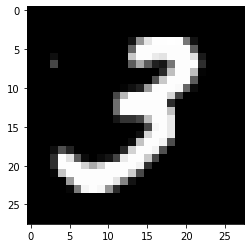

In [17]:
# You can run this cell multiple times to see different digit examples
idx = random.randrange(len(X))
print("The digit is %d" % y[idx])
plot_digit(X[idx])

# Task 1: Get familiar with running k-means

Read through the code below because you'll be using the ideas here for the next task

In [18]:
# Create a KMeans object with 5 clusters and random point selection
# for cluster initialization

clst = KMeans(n_clusters = 5, init = 'random')

In [19]:
# Cluster the data
clst.fit(X)

/Users/oates/tmp/env/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=5)

In [20]:
def get_cm(clst, y):
    """
    Given a cluster object that has been fit and the true labels for the data
    return a confusion matrix where cell (i, j) is the number of times true 
    class label j occurs in cluster i.
    """
    
    cm = np.zeros((np.unique(clst.labels_).shape[0], np.unique(y).shape[0]))

    for ypred, ytrue in zip(clst.labels_, y):
        cm[ypred][ytrue] += 1
        
    return cm

In [21]:
def plot_cm(cm):
    "Plot a confusion matrix"
    
    s = sns.heatmap(cm, cmap="GnBu", annot=True, fmt='g')
    s.set(xlabel='Digit', ylabel='Cluster')
    return s

In [22]:
# Get the confusion matrix for the 10 cluster case
cm = get_cm(clst, y)

It's hard to tell what you'll see below due to randomness, but typically there is one cluster with almost all of the 0's.  Find the row for which the 0 column has a very high count.  There is also typically a column that has most of the 1's.  The 4's, 7's, and 8's tend to clump into one cluster.  Look for the row that has high counts for those columns.

<Axes: xlabel='Digit', ylabel='Cluster'>

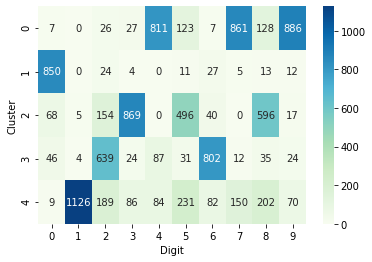

In [23]:
plot_cm(cm)

Cluster ID 0 centroid


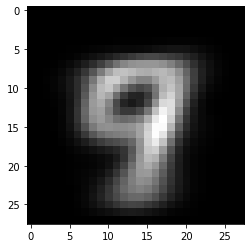

Cluster ID 1 centroid


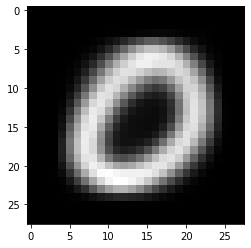

Cluster ID 2 centroid


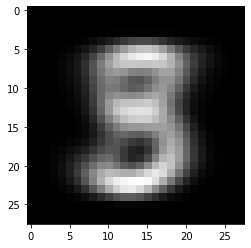

Cluster ID 3 centroid


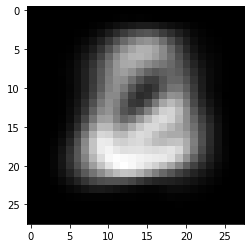

Cluster ID 4 centroid


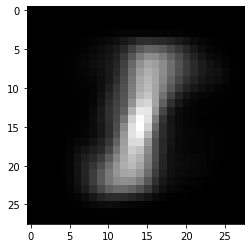

In [24]:
# Look at the centroids for all of the clusters
for i in range(len(clst.cluster_centers_)):
    print("Cluster ID %d centroid" % i)
    plot_digit(clst.cluster_centers_[i])

# Task 2: Varying k in k-Means

For values of k in {2, 10, 15} 
* cluster the digits
* print the confusion matrices
* plot the cluster centroids

Note that for k = 2, 2-means must combine distinct digits.  For k = 10 you would hope that it has a cluster for each digit in which that digit is by far the most common.  For k = 15 the expectation is that there may be clusters, for example, for the same digit but different ways of writing it (e.g., 9 with a straight bottom vs. 9 with a curled tail at the bottom).

For each of the three cases, write a couple of paragraphs on what you observe about the way k-means has clustered the data, why it has done it that way (e.g., certain digits are visually similar, be sure to say which ones and why), and why the cluster centroids look the way they do.  You don't have to talk about all of the clusters, especially in the k = 15 case, but you do need to mention several of them in each case.

# Task 3: Agglomerative Clustering

Read the scikit documentation on Agglomerative Clustering.  There are two important hyperparameters:
* linkage, which can take on values ‘ward’, ‘complete’, ‘average’, ‘single’
* metric, which can take on values “euclidean”, “l1”, “l2”, “manhattan”, “cosine”

Explore combinations of those hyperparameters with n_clusters = 10 and see how close you can get to the ideal of one majority digit per cluster.  
* Write a couple of paragraphs explaining what you tried, what worked and what didn't with example confusion matrices.  Include an explanation of **why** you think the best results were a result of the hyperparameters chosen in that case.  Note that you may need to dig through the scikit documentation or use the internet to get more information on their effects.